# **$\color{green}{\text{Student Name: Aysha AlRemeithi}}$**


$\color{blue}{\text{Batch 3 - Group B (2022) }}$

### Question (4): Part (B)

In [4]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#dynamics:
A = np.matrix([[1,-1],[0,1]])
#process noise variance:
V = np.matrix([[0,0],[0,0.1]])
#measurement model:
H = np.matrix([[1,0]])
#measurement noise variance:
W = np.matrix([[25]])

In [6]:
#these measurements start at time k=1,2,3.... 
# note that the first element is zero, it's never used (corresponds to z[0])
measurements_z = [np.nan, 32.1 , 39.8, 45.9, 52.0, 51.0, 63.4, 58.1, 60.3, 76.6, 73.0]  
inputs_uf = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]  #for k=0,...,`10

In [7]:
hat_x_m = np.mat([[20],[7]])  # prior estimate of the state
P_m = np.mat([[25,0],[0,1]])  # variance of prior

In [8]:
numSteps = 10  # how many time steps will we run the estimator?
# where we'll store the history our estimate
hist_hat_x_m = np.zeros([numSteps+1,2])  
# where we'll store the history our estimate's variance
hist_P_m_diag = np.zeros([numSteps+1,2])  

#save the prior:
hist_hat_x_m[0,0] = hat_x_m[0,0]
hist_hat_x_m[0,1] = hat_x_m[1,0]
hist_P_m_diag[0,0] = P_m[0,0]
hist_P_m_diag[0,1] = P_m[1,1]

for k in np.arange(1,numSteps+1):
    #step 1: Kalman filter prediction
    #our current input u(k-1):
    uf = inputs_uf[k-1]
    u = np.matrix([[uf],[0]])
    
    hat_x_p = A @ hat_x_m + u
    P_p = A @ P_m @ A.T + V
    
    #step 2: Kalman filter measurement update:
    #our current measurement 
    z = measurements_z[k]
    
    K = P_p @ H.T @ np.linalg.inv(H @ P_p @ H.T+ W)
    hat_x_m = hat_x_p + K @ (z - H @ hat_x_p)
    I = np.matrix([[1,0],[0,1]])
    P_m = (I-K @ H)@ P_p @(I-K @ H).T + K @ W @ K.T

    
    #store the variables for plotting. Don't modify the below lines:
    hist_hat_x_m[k,0] = hat_x_m[0,0]
    hist_hat_x_m[k,1] = hat_x_m[1,0]
    hist_P_m_diag[k,0] = P_m[0,0]
    hist_P_m_diag[k,1] = P_m[1,1]

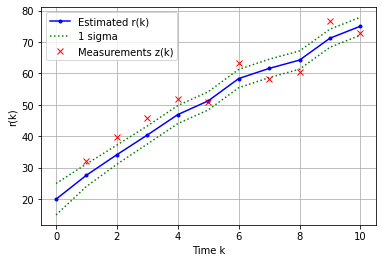

In [9]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_hat_x_m[:,0],'b.-',label="Estimated r(k)")
ax.plot(hist_hat_x_m[:,0]+np.sqrt(hist_P_m_diag[:,0]),'g:',label="1 sigma")
ax.plot(hist_hat_x_m[:,0]-np.sqrt(hist_P_m_diag[:,0]),'g:',)
ax.plot(measurements_z,'rx',label="Measurements z(k)")
ax.set_ylabel('r(k)')
ax.set_xlabel('Time k')
ax.legend()
ax.grid(True)

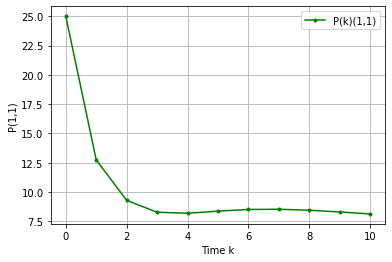

In [10]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_P_m_diag[:,0],'g.-',label="P(k)(1,1)")
ax.set_xlabel('Time k')
ax.set_ylabel('P(1,1)')
ax.legend()
ax.grid(True)

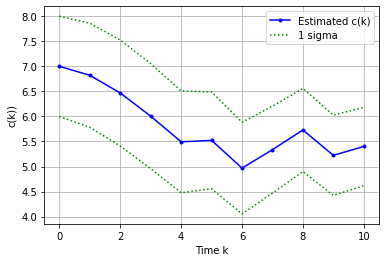

In [11]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_hat_x_m[:,1],'b.-',label="Estimated c(k)")
ax.plot(hist_hat_x_m[:,1]+np.sqrt(hist_P_m_diag[:,1]),'g:',label="1 sigma")
ax.plot(hist_hat_x_m[:,1]-np.sqrt(hist_P_m_diag[:,1]),'g:')

ax.set_xlabel('Time k')
ax.set_ylabel('c(k))')
ax.grid(True)
ax.legend()

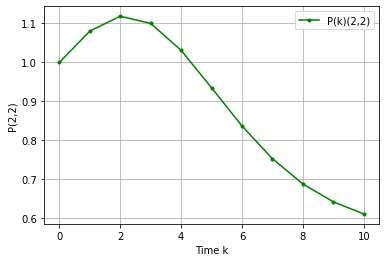

In [12]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_P_m_diag[:,1],'g.-',label="P(k)(2,2)")
ax.set_xlabel('Time k')
ax.set_ylabel('P(2,2)')
ax.legend()
ax.grid(True)